In [1]:
# line magic
%pylab inline

import pandas as pd
import seaborn as sns
import requests
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from collections import defaultdict

%config InlineBackend.figure_format = 'svg'
sns.set_style("white")


Populating the interactive namespace from numpy and matplotlib


## Challenge 1

- Open up a new IPython notebook
- Download a few MTA turnstile data files
- Open up a file, use csv reader to read it and ensure there is a column for each feature (C/A, UNIT, SCP, STATION). These are the first four columns.

In [2]:
download = True

In [3]:
def read_mta_turnstile(start, end):    
    if download:
        # Parsing start and end dates
        first = datetime.strptime(start, '%y%m%d').date()
        last = datetime.strptime(end,'%y%m%d').date()

        # Get the Saturday in the week of start and end day and convert the list 
        # of datetimes into strings for the purpose of reading '.txt' files
        dates = pd.date_range(first, last, freq='W')
        dates = [date - timedelta(days=1) for date in dates]
        dates = [datetime.strftime(date, '%y%m%d') for date in dates]

        # Download turnstile data for specific dates 
        mta_dfs = []
        for this_date in dates:
            url = f'http://web.mta.info/developers/data/nyct/turnstile/turnstile_{this_date}.txt'
            print(f'downloading {url}')

            mta_dfs.append(
                pd.read_csv(url)
            )    
        df_mta = pd.concat(mta_dfs)
        # Back up the download file in local disk
        df_mta.to_csv('turnstile_backup.csv')
    else:
        df_mta = pd.read_csv('turnstile_backup.csv')
    
    return df_mta

In [4]:
download = False

In [5]:
df = read_mta_turnstile('180701','180725')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786756 entries, 0 to 786755
Data columns (total 12 columns):
Unnamed: 0                                                              786756 non-null int64
C/A                                                                     786756 non-null object
UNIT                                                                    786756 non-null object
SCP                                                                     786756 non-null object
STATION                                                                 786756 non-null object
LINENAME                                                                786756 non-null object
DIVISION                                                                786756 non-null object
DATE                                                                    786756 non-null object
TIME                                                                    786756 non-null object
DESC                               

In [7]:
df.columns

Index(['Unnamed: 0', 'C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION',
       'DATE', 'TIME', 'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [8]:
df.columns = df.columns.str.strip()
df.columns

Index(['Unnamed: 0', 'C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION',
       'DATE', 'TIME', 'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [9]:
df.rename(columns={'Unnamed: 0':'week_index'}, inplace = True)

In [10]:
df.columns

Index(['week_index', 'C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION',
       'DATE', 'TIME', 'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [11]:
df.sample(5)

,week_index,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
535298,141478,R192,R039,00-00-03,MARBLE HILL-225,1,IRT,07/12/2018,00:00:00,REGULAR,267596,15618
100497,100497,N541,R241,01-06-00,15 ST-PROSPECT,FG,IND,06/25/2018,08:30:00,REGULAR,3112964,840954
158172,158172,R254,R181,01-00-01,110 ST,6,IRT,06/26/2018,12:00:00,REGULAR,4141098,1197441
172524,172524,R418,R106,00-06-01,CASTLE HILL AV,6,IRT,06/24/2018,08:00:00,REGULAR,3,135
632437,41630,N007A,R174,00-00-00,181 ST,A,IND,07/18/2018,05:00:00,REGULAR,9789611,10368195


# Challenge 2

- Let's turn this into a time series.
Create a new column that specifies the date and time of each entry.

You can convert the date and time into datetime objects -- That is a python class that represents a point in time. You can combine the date and time fields into a string and use the dateutil module to convert it into a datetime object. For an example check this StackOverflow question.

Also, check out this handy Pandas function.

In [12]:
df['DATETIME'] = df['DATE'] + ' ' + df['TIME']

In [13]:
df.sample(5)

,week_index,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
372590,175900,R508,R346,00-00-02,COURT SQ,7,IRT,07/05/2018,08:00:00,REGULAR,1440432,740481,07/05/2018 08:00:00
510345,116525,PTH13,R541,00-04-02,THIRTY ST,1,PTH,07/11/2018,20:16:28,REGULAR,1635878,241116,07/11/2018 20:16:28
707286,116479,PTH16,R550,01-00-03,LACKAWANNA,1,PTH,07/19/2018,07:07:40,REGULAR,92199,130496,07/19/2018 07:07:40
45974,45974,N049,R084,01-00-00,59 ST COLUMBUS,ABCD1,IND,06/25/2018,16:00:00,REGULAR,2729799,11140912,06/25/2018 16:00:00
321498,124808,R112,R027,02-00-02,WALL ST,23,IRT,07/02/2018,16:00:00,REGULAR,1286656,1051780,07/02/2018 16:00:00


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786756 entries, 0 to 786755
Data columns (total 13 columns):
week_index    786756 non-null int64
C/A           786756 non-null object
UNIT          786756 non-null object
SCP           786756 non-null object
STATION       786756 non-null object
LINENAME      786756 non-null object
DIVISION      786756 non-null object
DATE          786756 non-null object
TIME          786756 non-null object
DESC          786756 non-null object
ENTRIES       786756 non-null int64
EXITS         786756 non-null int64
DATETIME      786756 non-null object
dtypes: int64(3), object(10)
memory usage: 78.0+ MB


In [15]:
df['DATETIME'] = pd.to_datetime(df['DATETIME'], format="%m/%d/%Y %H:%M:%S")

In [16]:
df.sample(5)

,week_index,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
731729,140922,R192,R039,00-06-00,MARBLE HILL-225,1,IRT,07/20/2018,08:00:00,REGULAR,37397,199300,2018-07-20 08:00:00
385187,188497,R612,R057,01-00-05,ATL AV-BARCLAY,BDNQR2345,IRT,07/02/2018,00:00:00,REGULAR,1114315,812206,2018-07-02 00:00:00
689059,98252,N528,R257,01-05-00,EAST BROADWAY,F,IND,07/15/2018,04:00:00,REGULAR,249,0,2018-07-15 04:00:00
587162,193342,R643,R135,00-03-00,NEWKIRK AV,25,IRT,07/07/2018,01:00:00,REGULAR,986907,188029,2018-07-07 01:00:00
290914,94224,N506,R022,00-03-02,34 ST-HERALD SQ,BDFMNQRW,IND,07/04/2018,16:00:00,REGULAR,42961,54581,2018-07-04 16:00:00


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786756 entries, 0 to 786755
Data columns (total 13 columns):
week_index    786756 non-null int64
C/A           786756 non-null object
UNIT          786756 non-null object
SCP           786756 non-null object
STATION       786756 non-null object
LINENAME      786756 non-null object
DIVISION      786756 non-null object
DATE          786756 non-null object
TIME          786756 non-null object
DESC          786756 non-null object
ENTRIES       786756 non-null int64
EXITS         786756 non-null int64
DATETIME      786756 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(9)
memory usage: 78.0+ MB


# Challenge 3

- These counts are for every n hours. (What is n?) We want total daily entries.
Calculate to total daily entries for each turnstile.

Your result should be a new data frame that has the same keys, but now we have a single value for a single day, which is the total number of passengers that entered through this turnstile on this day.

In [18]:
# first, let's make sure everything is sorted so that sequential dates for individual turnstiles are adjacent
df.sort_values(by=['STATION', 'UNIT', 'C/A', 'SCP', 'DATETIME'], inplace=True)
df.head()

,week_index,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
29956,29956,H007,R248,00-00-00,1 AV,L,BMT,06/23/2018,00:00:00,REGULAR,13666640,15323756,2018-06-23 00:00:00
29957,29957,H007,R248,00-00-00,1 AV,L,BMT,06/23/2018,04:00:00,REGULAR,13666747,15324046,2018-06-23 04:00:00
29958,29958,H007,R248,00-00-00,1 AV,L,BMT,06/23/2018,08:00:00,REGULAR,13666837,15324374,2018-06-23 08:00:00
29959,29959,H007,R248,00-00-00,1 AV,L,BMT,06/23/2018,12:00:00,REGULAR,13667339,15325173,2018-06-23 12:00:00
29960,29960,H007,R248,00-00-00,1 AV,L,BMT,06/23/2018,16:00:00,REGULAR,13668090,15326274,2018-06-23 16:00:00


In [19]:
# compute differences between ENTRIES and store in a new column
# note: periods=-1 computes the difference between the value in a row and the value in the next row
df['ENTRY_DIFF'] = (df.groupby(['STATION', 'UNIT', 'C/A', 'SCP'])['ENTRIES']
                           .diff(periods=-1)) * -1

In [20]:
df.head()

,week_index,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,ENTRY_DIFF
29956,29956,H007,R248,00-00-00,1 AV,L,BMT,06/23/2018,00:00:00,REGULAR,13666640,15323756,2018-06-23 00:00:00,107.0
29957,29957,H007,R248,00-00-00,1 AV,L,BMT,06/23/2018,04:00:00,REGULAR,13666747,15324046,2018-06-23 04:00:00,90.0
29958,29958,H007,R248,00-00-00,1 AV,L,BMT,06/23/2018,08:00:00,REGULAR,13666837,15324374,2018-06-23 08:00:00,502.0
29959,29959,H007,R248,00-00-00,1 AV,L,BMT,06/23/2018,12:00:00,REGULAR,13667339,15325173,2018-06-23 12:00:00,751.0
29960,29960,H007,R248,00-00-00,1 AV,L,BMT,06/23/2018,16:00:00,REGULAR,13668090,15326274,2018-06-23 16:00:00,682.0


In [21]:
print(
    df['C/A'].nunique(),
    df['UNIT'].nunique(),
    df['SCP'].nunique(),
    df['STATION'].nunique()
)

733 465 218 377


In [22]:
 df['EXIT_DIFF'] = (df.groupby(['STATION', 'UNIT', 'C/A', 'SCP'])['EXITS']
                        .diff(periods=-1) * -1)

In [23]:
df.head()

,week_index,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,ENTRY_DIFF,EXIT_DIFF
29956,29956,H007,R248,00-00-00,1 AV,L,BMT,06/23/2018,00:00:00,REGULAR,13666640,15323756,2018-06-23 00:00:00,107.0,290.0
29957,29957,H007,R248,00-00-00,1 AV,L,BMT,06/23/2018,04:00:00,REGULAR,13666747,15324046,2018-06-23 04:00:00,90.0,328.0
29958,29958,H007,R248,00-00-00,1 AV,L,BMT,06/23/2018,08:00:00,REGULAR,13666837,15324374,2018-06-23 08:00:00,502.0,799.0
29959,29959,H007,R248,00-00-00,1 AV,L,BMT,06/23/2018,12:00:00,REGULAR,13667339,15325173,2018-06-23 12:00:00,751.0,1101.0
29960,29960,H007,R248,00-00-00,1 AV,L,BMT,06/23/2018,16:00:00,REGULAR,13668090,15326274,2018-06-23 16:00:00,682.0,1203.0


In [24]:
# There are some outliers...
df['ENTRY_DIFF'].min()

-1646681276.0

In [25]:
# filter to rows that meet specific conditions
df = df[(df['ENTRY_DIFF'] >= 0)
          & (df['ENTRY_DIFF'] < 100000)
          & (df['EXIT_DIFF'] >= 0)
          & (df['EXIT_DIFF'] < 100000)]

In [26]:
df['ENTRY_DIFF'].min()

-0.0

In [27]:
df['EXIT_DIFF'].min()

-0.0

In [28]:
# sum the daily entries
df.groupby(['C/A', 'SCP', 'DATE'])['ENTRY_DIFF'].sum()

C/A    SCP       DATE      
A002   02-00-00  06/23/2018     830.0
                 06/24/2018     606.0
                 06/25/2018    1378.0
                 06/26/2018    1234.0
                 06/27/2018    1481.0
                 06/28/2018    1422.0
                 06/29/2018    1422.0
                 06/30/2018     718.0
                 07/01/2018     521.0
                 07/02/2018    1356.0
                 07/03/2018    1331.0
                 07/04/2018     601.0
                 07/05/2018    1309.0
                 07/06/2018    1287.0
                 07/07/2018     642.0
                 07/08/2018     458.0
                 07/09/2018    1427.0
                 07/10/2018    1374.0
                 07/11/2018    1458.0
                 07/12/2018    1441.0
                 07/13/2018    1362.0
                 07/14/2018      20.0
                 07/15/2018       0.0
                 07/16/2018    1363.0
                 07/17/2018    1345.0
                 07/18

In [29]:
# use reset_index to create a dataframe from a groupby object
df_mta_daily_entries = df.groupby(['C/A', 'SCP', 'DATE'])['ENTRY_DIFF'].sum().reset_index()
df_mta_daily_entries

,C/A,SCP,DATE,ENTRY_DIFF
0,A002,02-00-00,06/23/2018,830.0
1,A002,02-00-00,06/24/2018,606.0
2,A002,02-00-00,06/25/2018,1378.0
3,A002,02-00-00,06/26/2018,1234.0
4,A002,02-00-00,06/27/2018,1481.0
5,A002,02-00-00,06/28/2018,1422.0
6,A002,02-00-00,06/29/2018,1422.0
7,A002,02-00-00,06/30/2018,718.0
8,A002,02-00-00,07/01/2018,521.0
9,A002,02-00-00,07/02/2018,1356.0


## Challenge 4

Now plot the daily time series for a turnstile.

In [30]:
df_mta_daily_entries.sample(5)

,C/A,SCP,DATE,ENTRY_DIFF
41148,N121B,00-00-02,07/16/2018,1254.0
98123,R226A,03-06-00,07/01/2018,169.0
92975,R186,00-00-03,07/01/2018,5.0
92947,R186,00-00-02,07/01/2018,20.0
121295,R533,00-03-04,07/20/2018,2111.0


In [31]:
df_single_SCP = df_mta_daily_entries[(df_mta_daily_entries['C/A'] == 'N501') &
                     (df_mta_daily_entries['SCP'] == '01-00-03')]

In [32]:
df_single_SCP

,C/A,SCP,DATE,ENTRY_DIFF
60225,N501,01-00-03,06/23/2018,610.0
60226,N501,01-00-03,06/24/2018,438.0
60227,N501,01-00-03,06/25/2018,1936.0
60228,N501,01-00-03,06/26/2018,2237.0
60229,N501,01-00-03,06/27/2018,2337.0
60230,N501,01-00-03,06/28/2018,2317.0
60231,N501,01-00-03,06/29/2018,2154.0
60232,N501,01-00-03,06/30/2018,592.0
60233,N501,01-00-03,07/01/2018,414.0
60234,N501,01-00-03,07/02/2018,1913.0


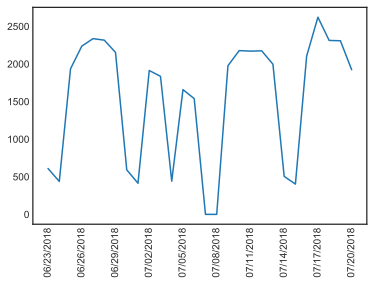

In [38]:
x = df_single_SCP.DATE; y = df_single_SCP.ENTRY_DIFF
plt.plot(x,y)
plt.xticks(range(0,len(x),3), df_single_SCP.DATE[::3], rotation = 90)
plt.show()

## Challenge 5

- So far we've been operating on a single turnstile level, let's combine turnstiles in the same ControlArea/Unit/Station combo. There are some ControlArea/Unit/Station groups that have a single turnstile, but most have multiple turnstilea-- same value for the C/A, UNIT and STATION columns, different values for the SCP column.

We want to combine the numbers together -- for each ControlArea/UNIT/STATION combo, for each day, add the counts from each turnstile belonging to that combo.

In [41]:
df_combo = df.groupby(['C/A','UNIT','STATION','DATE'])['ENTRY_DIFF'].sum().reset_index()

In [42]:
df_combo

,C/A,UNIT,STATION,DATE,ENTRY_DIFF
0,A002,R051,59 ST,06/23/2018,8197.0
1,A002,R051,59 ST,06/24/2018,6341.0
2,A002,R051,59 ST,06/25/2018,12693.0
3,A002,R051,59 ST,06/26/2018,13361.0
4,A002,R051,59 ST,06/27/2018,13592.0
5,A002,R051,59 ST,06/28/2018,13153.0
6,A002,R051,59 ST,06/29/2018,13539.0
7,A002,R051,59 ST,06/30/2018,7283.0
8,A002,R051,59 ST,07/01/2018,5722.0
9,A002,R051,59 ST,07/02/2018,12068.0


## Challenge 6

Similarly, combine everything in each station, and come up with a time series of [(date1, count1),(date2,count2),...] type of time series for each STATION, by adding up all the turnstiles in a station.

In [44]:
df_station = df.groupby(['STATION','DATE'])['ENTRY_DIFF'].sum().reset_index()

In [46]:
df_station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10520 entries, 0 to 10519
Data columns (total 3 columns):
STATION       10520 non-null object
DATE          10520 non-null object
ENTRY_DIFF    10520 non-null float64
dtypes: float64(1), object(2)
memory usage: 246.6+ KB


In [47]:
df_station['DATE'] = pd.to_datetime(df_station['DATE'], format = '%m/%d/%Y')

In [48]:
df_station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10520 entries, 0 to 10519
Data columns (total 3 columns):
STATION       10520 non-null object
DATE          10520 non-null datetime64[ns]
ENTRY_DIFF    10520 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 246.6+ KB


In [49]:
df_station.index = df_station.DATE

In [53]:
df_station.drop('DATE', axis =1, inplace = True)

In [57]:
df_station = df_station.pivot(columns='STATION',values='ENTRY_DIFF')

In [58]:
df_station

STATION,1 AV,103 ST,103 ST-CORONA,104 ST,110 ST,111 ST,116 ST,116 ST-COLUMBIA,121 ST,125 ST,...,WESTCHESTER SQ,WHITEHALL S-FRY,WHITLOCK AV,WILSON AV,WINTHROP ST,WOODHAVEN BLVD,WOODLAWN,WORLD TRADE CTR,YORK ST,ZEREGA AV
DATE,,,,,,,,,,,,,,,,,,,,,
2018-06-23,17425.0,19630.0,11396.0,1597.0,4880.0,10439.0,18584.0,5544.0,764.0,50319.0,...,2628.0,7659.0,611.0,3464.0,2919.0,15478.0,4433.0,8066.0,5351.0,1270.0
2018-06-24,16773.0,17295.0,8782.0,1239.0,5158.0,8573.0,18718.0,5374.0,603.0,44233.0,...,2211.0,8869.0,573.0,3156.0,2387.0,13072.0,3673.0,6818.0,6425.0,1153.0
2018-06-25,20294.0,32128.0,19517.0,3095.0,10607.0,16492.0,31620.0,14479.0,1270.0,74622.0,...,6165.0,20747.0,1749.0,4590.0,7280.0,25704.0,7258.0,19433.0,11696.0,2596.0
2018-06-26,21530.0,33334.0,20366.0,3208.0,10803.0,17018.0,33252.0,14771.0,1253.0,77131.0,...,6374.0,21379.0,1850.0,4583.0,7528.0,26832.0,7388.0,19077.0,12195.0,2674.0
2018-06-27,20989.0,31896.0,19422.0,3090.0,9995.0,16018.0,31000.0,15778.0,1225.0,73651.0,...,5784.0,20954.0,1683.0,4337.0,7161.0,24863.0,6989.0,18745.0,11689.0,2540.0
2018-06-28,21499.0,42924.0,18803.0,2937.0,9689.0,15538.0,30432.0,14889.0,1154.0,70929.0,...,5595.0,20730.0,1605.0,4238.0,6843.0,24063.0,6947.0,19996.0,11847.0,2507.0
2018-06-29,22462.0,19455.0,19744.0,2964.0,10382.0,15867.0,32003.0,13997.0,1231.0,75594.0,...,5759.0,22057.0,1685.0,4446.0,6749.0,25120.0,7348.0,19625.0,11748.0,2412.0
2018-06-30,16792.0,18639.0,14171.0,854.0,6792.0,10214.0,83933.0,5723.0,65.0,50229.0,...,2933.0,15553.0,911.0,3335.0,3040.0,11269.0,5065.0,10632.0,5575.0,1383.0
2018-07-01,11948.0,14015.0,10712.0,567.0,5013.0,7079.0,8539.0,4383.0,26.0,39879.0,...,2035.0,11861.0,729.0,2747.0,2246.0,7870.0,3470.0,8385.0,3564.0,1005.0


## Challenge 7

Plot the time series (either daily or your preferred level of granularity) for a station.

In [67]:
def plot_a_station(station_name):
    plt.plot(df_station[station_name])
    plt.xticks(rotation = 90)
    plt.show()

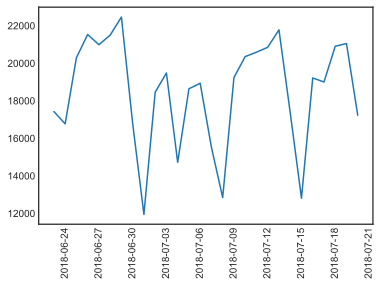

In [68]:
plot_a_station('1 AV')

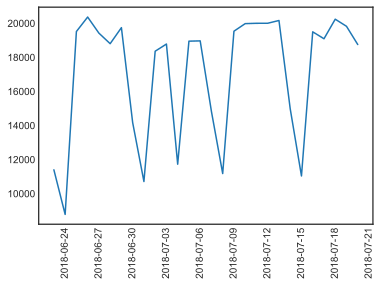

In [69]:
plot_a_station('103 ST-CORONA')

## Challenge 8

Select a station and find the total daily counts for this station. Then plot those daily counts for each week separately.

To clarify: if I have 10 weeks of data on the 28th st 6 station, I will add 10 lines to the same figure (e.g. running plt.plot(week_count_list) once for each week). Each plot will have 7 points of data.

In [115]:
a = df_station.index

In [119]:
a.weekday

Int64Index([5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5,
            6, 0, 1, 2, 3, 4],
           dtype='int64', name='DATE')

In [120]:
def plot_week_count_list(station_name):
    a = df_station.index[0]
    ticks_x = np.linspace(0,6,7)
    days = ['Sun','Mon','Tue','Wed','Thu','Fri','Sat']
    # while a < df_station.index[-1]:
    x = a.weekday
    y = df_station.station_name[x]
    plt.plot(x, y)
    plt.legend(a.strftime(format = '%Y-%m-%d'))
    #    a += timedelta(days=7)
    plt.xticks(ticks_x, days, fontsize = '20')  
    return y
        

In [121]:
plot_week_count_list('1 AV')

AttributeError: 'DataFrame' object has no attribute 'station_name'